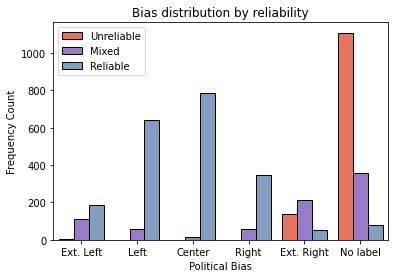

In [5]:
import pandas as pd
df = pd.read_csv('../data/attributes.csv')
# add bias label
df = df.merge(pd.read_csv('../data/bias_labels.csv'), on='url', how='left')
# # add traffic
# traffic_df = pd.read_csv ('data/traffic.csv')
# df = df.merge(traffic_df[['url', 'traffic']], on='url', how='inner')
# df.drop(columns=['traffic'], inplace=True)
df.fillna(3, inplace=True)
label = 'label'
df['label'] = df['label'] - 1
df['label'] = df['label'].apply(lambda x: 1 if x == 0 else x)

df['label'] = df['label'].apply(lambda x: 2 if x == 1 else x)
df['label'] = df['label'].apply(lambda x: 4 if x == 5 else x)

df_attr = df.copy()
df.drop(columns=['url', 'source'], inplace=True)


import seaborn as sns
import matplotlib.pyplot as plt
df['bias'].replace({None:3})
colors = ['tomato', '#966fd6', '#779ECB']
# ['#da291c','purple','#003da5']
sns.countplot(data=df, x="bias", hue="label", palette=colors, edgecolor='black')
plt.title('Bias distribution by reliability')#')

plt.xlabel('Political Bias')#.set_text('')
plt.ylabel('Frequency Count')
plt.xticks(range(6), ['Ext. Left', 'Left', 'Center', 'Right', 'Ext. Right', 'No label'])#, rotation=45)
plt.legend(['Unreliable', 'Mixed','Reliable' ])
# plt.show()
plt.savefig('../results/bias_by_reliability.png', dpi=300, bbox_inches='tight')
